# Лекция №10. Деревья классификации и регрессии.

Полезные ссылки.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

http://scikit-learn.org/stable/modules/cross_validation.html<br>
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics<br>

### Деревья решений для задач классификации

Рассмотрим понятие дерева на примере задачи с двумя предикторами $x_1$ и $x_2$ и двумя классами выходной переменной **X** и **O**.  
Получившуюся параметрическую плоскость необходимо разделить на части так, чтобы в каждой части **доминировал** один из классов (в реальных данных практически никогда не будет ситуации, когда в какую-то выделенную часть попадают только элементы одного класса).  
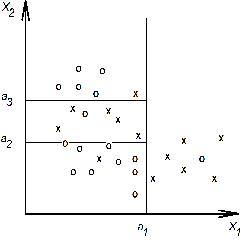

Тогда соответствующее дерево классификации будет выглядеть следующим образом:  
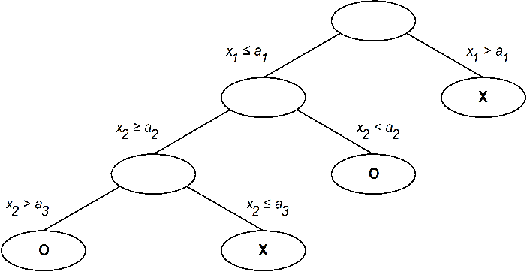

В деревьях классификации *внутренними параметрами* выступают значения разграничений гиперплоскостями $a_1$,..,$a_n$, где n+1 - число конечных узлов.

*Внешними параметрами* являются любые ограничения, накладываемые на само дерево. Примеры:  
* Высота дерева;  
* Минимальное кол-во элементов в узле родителя (ниже которого не происходит расщепление узла);
* Минимальное кол-во элементов в узле потомка (меньше которого не происходит расщепление и не появляется такой потомок);
* Минимальный порог уменьшения загрязнения (правило останова).

Введем понятие **загрязненность** (и противоположное ему - **чистота**) узла.  
**Загрязненностью** будем называть меру количества попаданий инородного класса в узел (например, попадание **O** в конечный узел, предсказание которого выдает **X**).

Вероятностью $p_j$ будем называть долю класса j во всех попавших в данный узел элементах. Если $p_j$ = 1, то узел чистый, т.к. в нем присутствует только класс j. Если $p_j$ = 0, то узел чистый от класса j, т.е. в нем не присутствует ни одного его элемента. Таким образом, в качестве функции загрязненности **H** необходимо выбрать такую функцию на промежутке [0;1], которая будет принимать максимум между краями и равна нулю на краях.

Пусть в задаче имеем k классов. Тогда предлагается несколько вариантов функции загрязненности:
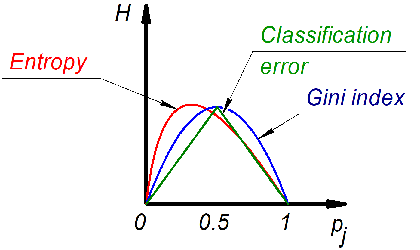

1) Энтропия (Entropy):
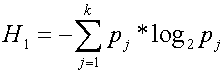

2) Индекс Джини (Gini Index, парабола):
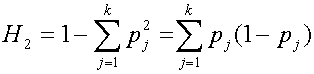

3) Ошибка классификации (Classification Error):
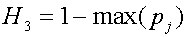

Зададимся некоторым расщеплением узла на 2 потомка. Тогда увеличение чистоты частоты узлов измеряется как:
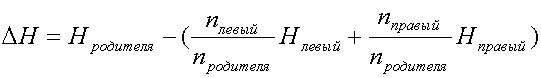

Дробные коэффициенты используются по принципу взвешенного среднего, т.е. чтобы учесть, что увеличение чистоты в узле с большим кол-вом значений более весомо.

Чтобы *оценить вклад каждого предиктора* в финальный результат, необходимо сложить все увеличения частот ```delta(H)``` в узлах, в роидтелях которых произошло расщепление по этому предиктору.

**Алгоритм классификации с помощью дерева**: Для каждого предиктора перебирается n-1 значений, где n - число элементов выборки, так, чтобы после каждого шага число элементов по одну сторону от гиперплоскости предиктора уменьшалось на 1, а по другую - увеличивалось. После такого перебора выбирается тот порог $a_j$, после расщепления по которому увеличение чистоты максимально.

### Пример №1

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Загружаем данные о выдаче кредита.
кредит -- решение о выдаче кредита (низкий или высокий), <br>
класс -- класс профессии (упорядоченный с точки зрения платёжеспособности),<br>
з\_плата -- способ выдачи зарплаты (ежемесячно или еженедельно),<br>
возраст -- разбитый по сегментам,<br>
кр\_карта -- есть или нет кредитная карта.<br>

In [3]:
df = pd.read_csv('Credit.csv', sep=';', encoding='cp1251')
df.head()

,кредит,клаcс,з_плата,возраст,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0


In [4]:
# Правильный ответ записываем в вектор y
y = df[u'кредит']
# Удаляем колонку с правильным ответом из таблицы и перемещаем в отдельный вектор ответов X
X = df.drop(u'кредит', axis=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None
                              )

# Обучаем модель
model.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

*Примечание*: Если данные не сбалансированы, т.е. возможных классов представлено не одинаковое кол-во (например, при двух классов одного содержится 90%, а другого - 10%), то классификатор может обучиться так, что ему проще всегда называть класс, которого в данных представлено больше всего (например, тот, которого 90%), чтобы обеспечить себе гарантированно высокую точность. Соответственно, второй класс никогда не будет предсказываться, что нас не устраивает. Для этого существует два решения:  
1) Скопировать данные, представленные в наименьшем кол-ве, т.е. искусственно сбалансировать выборку;  
2) Ввести весовые коэффициенты для каждого из классов, и, например, за ошибку на представленном в наименьшем кол-ве классе "штрафовать" классификатор сильнее. За это отвечает параметр ```class_weight```, в который в случае необходимости требуется передать матрицу весовых коэффициентов.

Для интерпретации получившейся модели удобно изобразить её в виде дерева предикатов (решающих правил). Для этого в ```sklearn.tree``` предусмотрена функция ```export_graphviz```. Однако неудобство её в том, что она выдаёт результат в виде файла векторной графики ```.dot```, который нужно дополнительно преобразовать в привычный формат (например, в ```.png```).  
Единственный способ преобразования в png, который заработал, это установка программы graphviz (https://www.graphviz.org/) и одноименного пакета в Python. После этого прописывается строчка ```os.environ["PATH"] += os.pathsep + 'D:/Programms/Graphviz/bin'``` с указанием пути к папке bin программы graphviz.

In [6]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
os.environ["PATH"] += os.pathsep + 'D:/Programms/Graphviz/bin'

dot_data = export_graphviz(model,
                out_file='my_tree.dot',
                # задать названия фич
                # feature_names=X.columns,
                class_names=None,
                # показывать названия полей у численных значений внутри узла
                label='all',
                # раскрашивать узлы в цвет преобладающего класса
                filled=True,
                # показывать значение impurity для каждого узла
                impurity=True,
                # показывать номера узлов
                node_ids=True,
                # Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                # Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=False,
                # Число точек после запятой для отображаемых дробей
                # precision=3
               )
# Преобразуем файл my_tree.dot в my_tree.dot.png
graphviz.render('dot', 'png', 'my_tree.dot')
# Вставляем картинку в блокнот. ЕСЛИ НЕ НУЖЕН ОТДЕЛЬНЫЙ ФАЙЛ PNG, А НАДО ТОЛЬКО ПОСМОТРЕТЬ, КОМАНДУ ВЫШЕ МОЖНО НЕ ВЫПОЛНЯТЬ.
graphviz.Source.from_file("my_tree.dot")

NameError: name 'os' is not defined

Модель позволяет оценить ценность каждой фичи в смысле её эффективности для разбиения (Gini importance). Эта оценка считает для каждой из фич сумму дельт по impurity (нормированную), полученных при разбиениях по этой фиче. Для этого у модели есть метод ```feature_importances_```.

In [7]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,з_плата,0.706473
2,возраст,0.234163
0,клаcс,0.056472
3,кр_карта,0.002892


Как и ранее, у данной модели реализован метод ```predict```, который позволяет получить предсказания классов для входного списка элементов, представленных в пространстве тех же самых признаков (то есть подаём на вход матрицу).

In [8]:
# Предсказание класса для новых элементов
new_item = [1, 1, 1, 1]
model.predict([new_item])

c:\users\bokoser_user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Разбиение на обучающую и тестовую выборки

Данную модель мы обучили на всех имеющихся данных. С одной стороны это хорошо -- ведь мы использовали все имеющиеся данные, с другой стороны, это плохо с точки зрения оценки качества получившейся модели. Хорошо бы уметь его измерять. Оценка качества поможет нам улучшать текущую модель и сравнивать результаты с другими моделями. Хочется, чтобы у нас была отдельная тестовая выборка, на которой можно было бы проверять качество полученной модели. Ведь если взять любой пример из множества обучения, то модель даст на нём заведомо покажет себя хорошо -- она же его уже видела.

Для этого в процессе обучения данные разбивают на два множества -- обучающее (learn, train) и тестовое (test). В ```sklearn.model_selection``` для этого предусмотрена функция ```train_test_split```.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)
# обучаем модель на тренировочных данных
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [10]:
# Строим предсказание модели на тестовом множестве
y_pred = model.predict(X_test)

### Оценка качества классификатора

Теперь нужно измерить качество предсказания. Зачастую для этого достаточно просто посчитать долю совпавших ответов в ```y_pred``` и ```y_test```. Но обычная точность даёт искажённые результаты в случае, когда в распределении классов имеется смещение. Например, если в бинарной классификации отношение классов 0/1 равно 90/10 и если у нас есть классификатор, который всегда отвечает 0, то тогда точность такой модели будет равна 0.9, что неоправданно высоко.

Чтобы избежать эти проблемы, надёжнее считать такие показатели как точность и полноту. Сначала построим матрицу ошибок $C = (c_{i,j})$, где $c_{i, j}$ -- количество элементов класса $i$, которым классификатор присвоил класс $j$. Для этого есть функция ```confusion_matrix``` в библиотеке ```sklearn.metrics```.

In [11]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,27,3
1,10,25


Тогда по определению
<center>
```
TP (True Positive) = 25
TN (True Negative) = 27
FP (False Positive) = 3
FN (False Negative) = 10
```
</center>

$$
\begin{array}{сс}
Precision = \frac{TP}{TP + FP} &
Recall = \frac{TP}{TP + FN}\\
\end{array}
$$

Физический смысл точности -- доля правильно классифицированных положительных объектов среди всех положительных объектов, _определённых классификатором_. Физический смысл полноты -- доля правильно классифицированных положительных объектов среди всех _истинных положительных объектов_.

Но для полного счастья хочется иметь не два, а одно число, описывающее качество классификатора. Для этого используют функции семейства F-мер. Например, гармоническое среднее:

$$F1 = \frac{2\cdot Precision \cdot Recall}{Precision + Recall}.$$

Но бывает, что точность и полнота важны для качества классификации не в равных степенях. Например, если мы определяем рак по фотоснимкам тканей, то нам гораздо важнее полнота: если классификатор сработает ложно, то в таком случае мы назначим лечение здоровому человеку. А вот если классификатор пропустит у пациента заболевание, то лечение мы не назначим, и это скорее всего приведёт к гораздо более тяжёлым последствиям. Наоборот, если мы классифицируем спам, то нам, вероятно, точность более важна, чем полнота. Если мы пропустим спамное сообщение и пользователь его прочитает, то это всего лишь мелкое недоразумение. А если мы ошибочно посчитаем важное сообщение спамом и удалим его, это уже криминал.

Так вот, для балансировки между точностью и полнотой используется параметр $\beta$:
$$F = (\beta^2 + 1)\frac{Precision \cdot Recall}{\beta^2Precision + Recall}.$$
Если мы отдаём приоритет точности, то нужно выбирать $\beta\in (0, 1)$, если полноте, то $\beta > 1$. При $\beta=1$ получаем определённую выше F1-меру.

Точность, полноту и F1-меру можно посчитать при помощи встроенной функции ```sklearn.metrics.classification_report```.

In [12]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        37
           1       0.71      0.89      0.79        28

    accuracy                           0.80        65
   macro avg       0.81      0.81      0.80        65
weighted avg       0.82      0.80      0.80        65



### Пример №2. Наборы гиперпараметров

Хотим прогнать наборы гиперпараметров не вручную, а автоматически.

In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('Wine.txt', sep='\t')
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [16]:
# Инициализируем модель
wine_model = DecisionTreeClassifier(random_state=19,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               # минимальное значение дельты impurity
                               min_impurity_decrease=0.001,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               min_weight_fraction_leaf=0,
                               splitter='best',
                               max_features=None
                              )

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19,
                                                    # доля объёма тестового множества
                                                    test_size=0.33)

Определяем тестируемые значения гиперпараметров

In [18]:
params_set = {
              'max_depth': [3, 4, 6],
              'min_samples_leaf': [2, 4, 8],
              'min_samples_split': [8, 10, 14]
             }

Проводим 5-fold кросс-валидацию

In [19]:
grid_CV = GridSearchCV(estimator=wine_model,
                       param_grid=params_set,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)

In [20]:
grid_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6,
                                              min_impurity_decrease=0.001,
                                              min_samples_leaf=8,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0,
                                              random_state=19),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 6], 'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [8, 10, 14]},
             scoring='accuracy')

Выбор наилучших гиперпараметров:

In [21]:
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}


Значение критерия качества для лучших гиперпараметров:

In [22]:
best_CV_score = grid_CV.best_score_
print('Лучшее accuracy', best_CV_score)

Лучшее accuracy 0.8979915433403806


Применяем к тестовой выборке

In [23]:
best_model = grid_CV.best_estimator_
test_acc = best_model.score(X_test, y_test)
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.822429906542056


Более подробный вывод результатов:

In [24]:
means = grid_CV.cv_results_['mean_test_score']
stds = grid_CV.cv_results_['std_test_score']

In [25]:
for mean, std, params in zip(means, stds, grid_CV.cv_results_['params']):
    print("%0.4f (+/-%0.03f) for %r" % (mean, std*2, params))

0.8980 (+/-0.057) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.8980 (+/-0.057) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8980 (+/-0.057) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.8794 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.8794 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.8794 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.8794 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 8}
0.8794 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.8794 (+/-0.063) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 14}
0.8840 (+/-0.052) for {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.8840 (+/-0.052) for {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8840 (+/-0.052) for {'max_depth': 4, 'min_sam

### Деревья решений для задач регрессии

С помощью деревьев можно решать не только задачу классификации, но и задачу регрессии. То есть когда отклик не дискретный, а непрерывный. Для таких задач реализован класс ```sklearn.tree.DecisionTreeRegressor```, и все шаги по созданию модели точно так же переносятся и на этот класс (даже названия методов одни и те же).

С точки зрения теории, теперь у нас не отдельные классы, а непрерывный спектр значений выходной переменной. Поэтому для новых данных при попадании в каждый конечный узел будет присваиваться не значение класса, а среднее значений из обучающей выборки, попавших в этот узел после обучения дерева.

Результатом работы дерева для задачи регрессии будет являться кусочно-непрерывная функция. Продемонстрируем на простейшем примере с 1 предиктором:
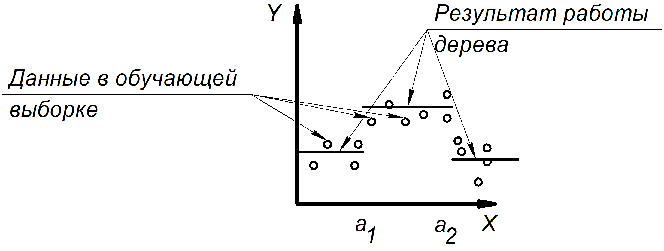

В качестве функции увеличения чистоты узла для деревьев регрессии используется функция понижения дисперсии:
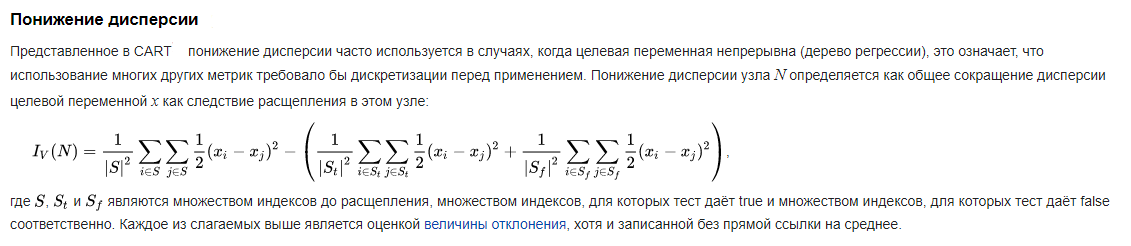

### Пример

In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
rng = np.random.RandomState(1)
X = np.sort(5*rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [29]:
regr_3 = DecisionTreeRegressor(max_depth=3)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [30]:
regr_5 = DecisionTreeRegressor(max_depth=5)
regr_5.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [31]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test_3 = regr_3.predict(X_test)
y_test_5 = regr_5.predict(X_test)

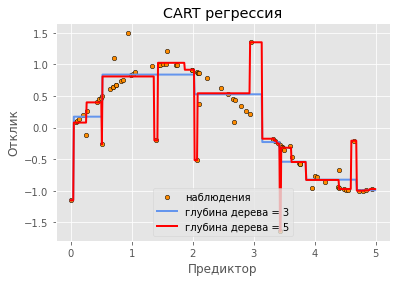

In [32]:
plt.figure()
plt.scatter(X, y, s=20, edgecolors="black", 
            c="darkorange", label=u"наблюдения")
plt.plot(X_test, y_test_3, color="cornflowerblue",
         label=u"глубина дерева = 3", linewidth=2)
plt.plot(X_test, y_test_5, color="red",
         label=u"глубина дерева = 5", linewidth=2)
plt.xlabel(u"Предиктор")
plt.ylabel(u"Отклик")
plt.title(u"CART регрессия")
plt.legend()
plt.show()

*Примечание*: дерево с максимальной высотой 5 переобучилось.


### Методы улучшения классификаторов

Отдельно деревья решений редко используются в практических задачах, т.к. показывают чаще всего неудовлетворительные результаты. Однако на основе их комбинаций строятся улучшенные решения.  
Приемы улучшения классификаторов:  
* **Stacking**: каждое дерево выдает свой вектор предсказаний. А далее все вектора предсказаний используются как предикторы для нового классификатора, т.е. являются новыми независимыми переменными.  
* **Bagging (bootstrap aggregation)**: Оно же **случайный лес**. Основывается на "мнении толпы": каждое дерево выдает свое предсказание и в качестве итогового ответа выбирается или класс, за который проголосовало наибольшее кол-во деревьев, (в случае классификации), или усредненное значение ответов всех деревьев (в случае регрессии).  
* **Boosting**: Имеем много слабых классификаторов. Каждый следующий классификатор стремится предсказать не изначальный вектор правильных ответов Y, а ошибки предыдущего классификатора (для 2-го классификатора это будет e1 = (Y-Y^), для 3-го - e2 = (e1-e1^) и т.д.), т.е. каждый следующий классификатор становится лучше предыдущего.